<div class="usecase-title">Analyzing Access to Free and Cheap Support Services and Its Impact on Wellbeing Indicators in Melbourne T2 2024</div>

<div class="usecase-authors"><b>Authored by: </b>Katrine Chan</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python </div>
</div>

<div class="usecase-section-header"><i><b>Scenario</i></b></div>

The City of Melbourne has recognized the importance of accessible support services in promoting personal wellbeing and social connection within the community. In recent years, there has been a growing need to understand how free and low-cost support services are distributed across the city and their impact on community wellbeing. The primary goal is to analyze the spatial distribution of these services and examine their correlation with key indicators of personal wellbeing and social connection. By doing so, the City of Melbourne aims to enhance service provision and improve overall community wellbeing. 

<div class="usecase-section-header"><i><b>User Story</i></b></div>

As a Community Planner at the City of Melbourne, I want to understand the accessibility and impact of free and low-cost support services on personal wellbeing and social connection within the community so that I can make informed decisions to enhance service provision and improve overall community wellbeing. Through this analysis, I aim to discover:

* Explore the free support services availalbe within the melbourne City



At the end of this use case you will:
* Have gained an understanding of using APIs
* Have learned how to fetch datasets using APIs from Melbourne Open Data Database 
* Become familiar with performing data pre-processing
* Learned how to visualise real-life data using appropriate visualisation tools
* Learned how to work with more than one dataset


<div class="usecase-section-header"><i><b>Introduction</i></b></div>

To complete this analysis, two datasets will be used.  These datasets will include below: 

* Indicators of wellbeing by year (Future Melbourne)
This data collects data annually on the personal wellbeing, social connection, self-reported health, volunteering behaviour, food security, acceptance of diverse cultures; engagement in decision making and arts and cultural activities of residents in Melbourne Local Government Area of 400 respondents.

* Free and cheap support services, with opening hours, public transport and parking options (Helping Out)
The City of Melbourne's Helping Out booklet provides a list of free and cheap support services available from more than 70 organisations. The list includes food, accommodation, health services, drug and alcohol services, and legal advice.

# Table of Contents

* [Part 1 - Importing Required Modules](#part1)
* [Part 2 - Retrieving Helping Out Data Set](#part2)
* [Part 3 - Understanding and Pre-Processing Future Melbourne Dataset fm_df](#part3)
* [Part 4 - Exploratory Data Analysis fm_df](#part4)
* [Part 5 - Retrieving Helping Out Data Set](#part5)
* [Part 6 - Understanding and Pre-Processing Helping Out Dataset ho_df](#part6)
* [Part 7 - Exploratory Data Analysis ho_df](#part7)




<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part1">Part 1 - Importing Required Modules</p> </a>

In [1]:
# importing required modules to complete this analysis

import requests 
import pandas as pd 
import numpy as np 
from io import StringIO 

import matplotlib.pyplot as plt 
from wordcloud import WordCloud 

import folium
from folium.plugins import MousePosition
from ipywidgets import interact, widgets
from IPython.display import display



<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part2">Part 2 - Retrieving Future Melbourne Data Set</p></a>

In [2]:
# https://data.melbourne.vic.gov.au/explore/dataset/indicators-of-wellbeing-by-year-future-melbourne/information/
dataset_id = 'indicators-of-wellbeing-by-year-future-melbourne'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# apikey = ''
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1, # all records
    'lang': 'en',
    'timezone': 'UTC'
    #'api_key': apikey
}

#GET request 
response = requests.get(url, params = params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    fm_df = pd.read_csv(StringIO(url_content), delimiter= ';')
else: 
    print(f'Request failed with status code{response.status_code}')

In [3]:
# printing out the Future Melbourne Data set fm_df
fm_df.head(5)

,indicator_label,indicator_description,unit,2012,2013,2014,2015,2016,population,source
0,Quality of life,Personal subjective wellbeing Index (average o...,%,75.6,76.7,76.8,76.9,76.5,Resident,Future Melbourne Social Survey
1,Quality of life (Male),Personal subjective wellbeing Index (average o...,%,75.6,76.7,77.4,76.6,75.9,Resident,Future Melbourne Social Survey
2,Quality of life (18-35 yrs),Personal subjective wellbeing Index (average o...,%,75.6,74.9,76.9,76.1,76.3,Resident,Future Melbourne Social Survey
3,Quality of life (36 yrs and over),Personal subjective wellbeing Index (average o...,%,75.5,78.3,76.8,77.6,76.6,Resident,Future Melbourne Social Survey
4,Personal relationships,How satisfied people feel with their personal ...,%,77.0,79.8,80.0,78.9,79.5,Resident,Future Melbourne Social Survey


<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part3">Part 3 - Understanding and Pre-Processing Future Melbourne Data Set</p></a>

In [4]:
# Understanding the shape of fm_df
num_rows, num_columns = fm_df.shape

print(f'The Future Melbourne Dataset has {num_rows} rows and {num_columns} columns.')

The Future Melbourne Dataset has 88 rows and 10 columns.


In [5]:
fm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   indicator_label        88 non-null     object 
 1   indicator_description  88 non-null     object 
 2   unit                   88 non-null     object 
 3   2012                   65 non-null     float64
 4   2013                   65 non-null     float64
 5   2014                   88 non-null     float64
 6   2015                   88 non-null     float64
 7   2016                   88 non-null     float64
 8   population             88 non-null     object 
 9   source                 88 non-null     object 
dtypes: float64(5), object(5)
memory usage: 7.0+ KB


Above shows that there are 23 observations with NA values in both 2012 and 2013.  

In [6]:
# Displaying observations with any Na values and understanding what they are 
obs_na = fm_df[fm_df.isna().any(axis=1)]

obs_na

,indicator_label,indicator_description,unit,2012,2013,2014,2015,2016,population,source
12,Perceptions of safety - daytime,People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,96.3,97.1,90.3,City users,Council Plan Intercept Social Survey
13,Perceptions of safety - daytime (Male),People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,94.9,98.1,91.5,City users,Council Plan Intercept Social Survey
14,Perceptions of safety - daytime (40 yrs and over),People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,95.4,96.5,89.7,City users,Council Plan Intercept Social Survey
15,Perceptions of safety - night time,People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,56.7,62.1,69.9,City users,Council Plan Intercept Social Survey
16,Perceptions of safety - night time (40 yrs and...,People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,57.6,61.1,78.6,City users,Council Plan Intercept Social Survey
30,Food Growing (Female),"People who grow herbs, fruits or vegetables",%,NaN,NaN,59.0,46.5,55.5,Residents,Future Melbourne Social Survey
31,Food Growing (18-35 yrs),"People who grow herbs, fruits or vegetables",%,NaN,NaN,45.0,38.4,36.4,Residents,Future Melbourne Social Survey
32,Food Producing,People who produce some of their own food (gro...,%,NaN,NaN,59.8,58.3,54.8,Residents,Future Melbourne Social Survey
41,Perceptions of safety - daytime (18-39 yrs),People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,97.4,98.1,90.7,City users,Council Plan Intercept Social Survey
42,Perceptions of safety - night time (18-39 yrs),People Who Feel Safe or Very Safe in public sp...,%,NaN,NaN,55.0,63.7,65.1,City users,Council Plan Intercept Social Survey


Looks like most of these rows are just missing records for year 2012 and 2013. Despite these being NA, we will be keeping these as these observations could still be important for our analysis. 

<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part4">Part 4 - Exploratory Data Analysis of fm_df</p></a>

In [7]:
# Function to plot the observations
def plot_trend(indicator_label):
    selected_data = fm_df[fm_df['indicator_label'] == indicator_label]
    if not selected_data.empty:
        years = ['2012', '2013', '2014', '2015', '2016']
        values = selected_data[years].values[0]
        
        plt.figure(figsize=(10, 6))
        plt.plot(years, values, marker='o')
        plt.title(f'Trend for {indicator_label}')
        plt.xlabel('Year')
        plt.ylabel('Percentage')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for {indicator_label}")

# Create the dropdown widget, allowing the users to pick an indicator
indicator_dropdown = widgets.Dropdown(
    options=fm_df['indicator_label'].unique(),
    description='Indicator:')

# Use interact to create the interactive plot
interact(plot_trend, indicator_label=indicator_dropdown)


interactive(children=(Dropdown(description='Indicator:', options=('Quality of life', 'Quality of life (Male)',…

<function __main__.plot_trend(indicator_label)>

<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part5">Part 5 - Retrieving Helping Out Data Set</p></a>



In [8]:
# Retrieving Helping Out Data Set from Melbourne Open Data

# https://data.melbourne.vic.gov.au/explore/dataset/free-and-cheap-support-services-with-opening-hours-public-transport-and-parking-/information/
dataset_id = 'free-and-cheap-support-services-with-opening-hours-public-transport-and-parking-'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# apikey = ''
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1, # all records
    'lang': 'en',
    'timezone': 'UTC'
    #'api_key': apikey
}

#GET request 
response = requests.get(url, params = params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    ho_df = pd.read_csv(StringIO(url_content), delimiter= ';')
else: 
    print(f'Request failed with status code{response.status_code}')

<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part6">Part 6 - Understanding and Pre-Processing Helping Out Dataset ho_df</p></a>

In [9]:
# Understanding the shape of ho_df
num_rows, num_columns = ho_df.shape

print(f'The Helping Out Dataset has {num_rows} rows and {num_columns} columns.')

The Helping Out Dataset has 119 rows and 34 columns.


In [10]:
ho_df.head(5)

,name,what,who,address_1,address_2,suburb,phone,phone_2,free_call,email,...,nearest_train_station,category_1,category_2,category_3,category_4,category_5,category_6,longitude,latitude,geocoded_location
0,Child Protection Emergency Service,NaN,NaN,NaN,NaN,NaN,13 12 78,NaN,NaN,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gamblers Help Line Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800 858 858,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kids Help line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800 551 800,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lifeline (24 hour crisis counselling),NaN,NaN,NaN,NaN,NaN,13 11 14,NaN,NaN,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Narcotics Anonymous - Victorian Area Helpline,NaN,NaN,NaN,NaN,NaN,9525 2833,NaN,NaN,info@navic.net.au,...,NaN,Helpful phone number,Helpful website,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ho_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   118 non-null    object 
 1   what                   97 non-null     object 
 2   who                    27 non-null     object 
 3   address_1              17 non-null     object 
 4   address_2              90 non-null     object 
 5   suburb                 90 non-null     object 
 6   phone                  100 non-null    object 
 7   phone_2                4 non-null      object 
 8   free_call              27 non-null     object 
 9   email                  50 non-null     object 
 10  website                114 non-null    object 
 11  twitter                62 non-null     object 
 12  social_media           61 non-null     object 
 13  monday                 88 non-null     object 
 14  tuesday                88 non-null     object 
 15  wednes

In [12]:
# Understanding how many NA value in each of the features 
ho_df.isnull().sum()

name                       1
what                      22
who                       92
address_1                102
address_2                 29
suburb                    29
phone                     19
phone_2                  115
free_call                 92
email                     69
website                    5
twitter                   57
social_media              58
monday                    31
tuesday                   31
wednesday                 31
thursday                  31
friday                    31
saturday                  32
sunday                    32
public_holidays           32
cost                     103
tram_routes               44
bus_routes               112
nearest_train_station     87
category_1                 6
category_2                65
category_3                92
category_4               110
category_5               116
category_6               119
longitude                 31
latitude                  30
geocoded_location         31
dtype: int64

In [13]:
# showing geocodes with null values 
no_geocode = ho_df[ho_df['geocoded_location'].isnull()]

no_geocode


,name,what,who,address_1,address_2,suburb,phone,phone_2,free_call,email,...,nearest_train_station,category_1,category_2,category_3,category_4,category_5,category_6,longitude,latitude,geocoded_location
0,Child Protection Emergency Service,NaN,NaN,NaN,NaN,NaN,13 12 78,NaN,NaN,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gamblers Help Line Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800 858 858,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kids Help line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800 551 800,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lifeline (24 hour crisis counselling),NaN,NaN,NaN,NaN,NaN,13 11 14,NaN,NaN,NaN,...,NaN,Helpful phone number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Narcotics Anonymous - Victorian Area Helpline,NaN,NaN,NaN,NaN,NaN,9525 2833,NaN,NaN,info@navic.net.au,...,NaN,Helpful phone number,Helpful website,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Victims of Crime Help Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800 819 817,NaN,...,NaN,Helpful phone number,Helpful website,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Vietnamese & Settlement Program,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Victorian State-wide Human Services Directory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Helpful website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,City of Melbourne’s Social Support Directory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Helpful website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Homelessness Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Helpful website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As most of these observations have minimal information against them, with most of the entries being NAs, these will be removed. 

In [14]:
# showing name with null values 
no_name = ho_df[ho_df['name'].isnull()]

no_name


,name,what,who,address_1,address_2,suburb,phone,phone_2,free_call,email,...,nearest_train_station,category_1,category_2,category_3,category_4,category_5,category_6,longitude,latitude,geocoded_location
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The obervation with NA as a name will also be removed as there is no important information in that observation. 

In [15]:
# Category_6 is dropped as there was not any data in category_6
ho_df = ho_df.drop(columns=['category_6'])

# Dropping observations with no "geocoded_location" and "name" as these will not be useful for our future analysis
ho_df = ho_df.dropna(subset=['geocoded_location', 'name'])
ho_df.head(5)


,name,what,who,address_1,address_2,suburb,phone,phone_2,free_call,email,...,bus_routes,nearest_train_station,category_1,category_2,category_3,category_4,category_5,longitude,latitude,geocoded_location
6,Aboriginal Family Violence Prevention and Lega...,"Legal Services, Counselling Support, Informati...",NaN,Level 3,70-80 Wellington Street,Collingwood,9244 3333,NaN,1800 105 303,NaN,...,NaN,NaN,Legal / Financial Advice,Counselling and Psychiatric Services,NaN,NaN,NaN,144.986299,-37.806427,"-37.806427, 144.986299"
7,Alcoholics Anonymous Victoria,AA is a fellowship of men and women who share ...,NaN,Level 1,36 Church Street,Richmond,9429 1833,NaN,NaN,NaN,...,NaN,NaN,Drug and Alcohol,NaN,NaN,NaN,NaN,145.000307,-37.811648,"-37.811648, 145.000307"
8,Royal Melbourne Hospital,Outpatients’ emergency service,NaN,NaN,300 Grattan Street,Parkville,9342 7000,NaN,NaN,enquiries@mh.org.au,...,"401, 402 (Royal Melbourne Hospital/Grattan St ...",NaN,Hospitals / Emergency,NaN,NaN,NaN,NaN,144.956177,-37.798877,"-37.798877, 144.956177"
9,Anglicare Victoria – St.Mark’s Community Centre,St Mark’s provides assistance to homeless peop...,NaN,NaN,250 George Street,Fitzroy,9419 3288,NaN,NaN,NaN,...,NaN,NaN,Food,Clothes and Blankets,Showers / Laundry,NaN,NaN,144.981835,-37.801611,"-37.801611, 144.981835"
10,Brotherhood of St Laurence Coolibah Centre,"Breakfast $1.00 \nlunch $3, afternoon tea $0.2...",A person may be eligible for the Coolibah Cent...,NaN,67A Brunswick Street,Fitzroy,1300 147 147,NaN,NaN,bacci@bsl.org.au,...,NaN,NaN,Food,Accommodation,Health Services / Pharmacy,Showers / Laundry,Counselling and Psychiatric Services,144.977265,-37.805286,"-37.805286, 144.977265"


In [16]:
num_rows, num_columns = ho_df.shape

print(f'The Cleaned Helping Out Dataset has {num_rows} rows and {num_columns} columns.')

The Cleaned Helping Out Dataset has 88 rows and 33 columns.


<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="part7">Part 7 - Exploratory Data Analysis ho_df</p></a>

In [17]:
# Display all unique suburbs in 'category_1' with their counts
suburb_count = ho_df['suburb'].value_counts()

# Print the number of service count in each suburb
print("Number of Service available in each suburb:")
for category, count in suburb_count.items():
    print(f"{category}: {count}")


Number of Service available in each suburb:
Melbourne: 23
Fitzroy: 14
North Melbourne: 8
Collingwood: 6
West Melbourne: 4
Flemington: 3
St Kilda: 3
Carlton: 3
East Melbourne: 3
South Melbourne: 3
Parkville: 3
Footscray: 2
Richmond: 2
Kensington: 2
Caulfield South: 1
Albert Park: 1
Preston: 1
Glenroy: 1
Moonee Ponds: 1
Northcote: 1
ST KILDA: 1
Carlton North: 1
Abbotsford: 1


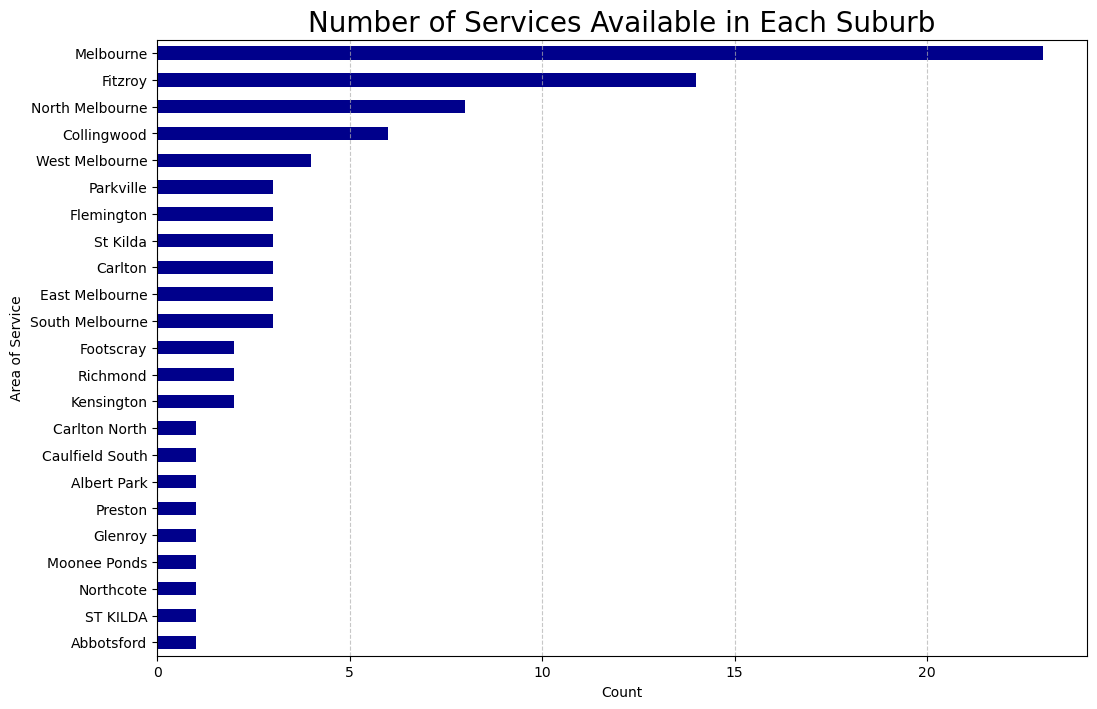

In [18]:
# Area of Service 
area = ho_df['suburb'].value_counts().sort_values(ascending = True)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
area.plot(kind='barh', color='darkblue')

# Customize the chart
plt.xlabel('Count')
plt.ylabel('Area of Service')
plt.title('Number of Services Available in Each Suburb', fontsize = 20)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability

# Show the plot
plt.show()

Above chart shows that most services are available within the Melbourne City, with Fitzroy being the next suburb having most support services. 

In [19]:
# Display all unique categories in 'category_1' with their counts
category_counts = ho_df['category_1'].value_counts()

# Print the unique categories with their counts
print("Unique categories in 'category_1' with their counts:")
for category, count in category_counts.items():
    print(f"{category}: {count}")


Unique categories in 'category_1' with their counts:
Food: 17
Accommodation: 14
Health Services / Pharmacy: 12
Legal / Financial Advice: 11
Hospitals / Emergency: 11
Counselling and Psychiatric Services: 8
Drug and Alcohol: 4
Travel Assistance: 2
Tenancy Assistance: 2
Helpful phone number: 2
Clothes and Blankets: 1
Employment Assistance: 1
Needle Exchange: 1
Showers / Laundry: 1


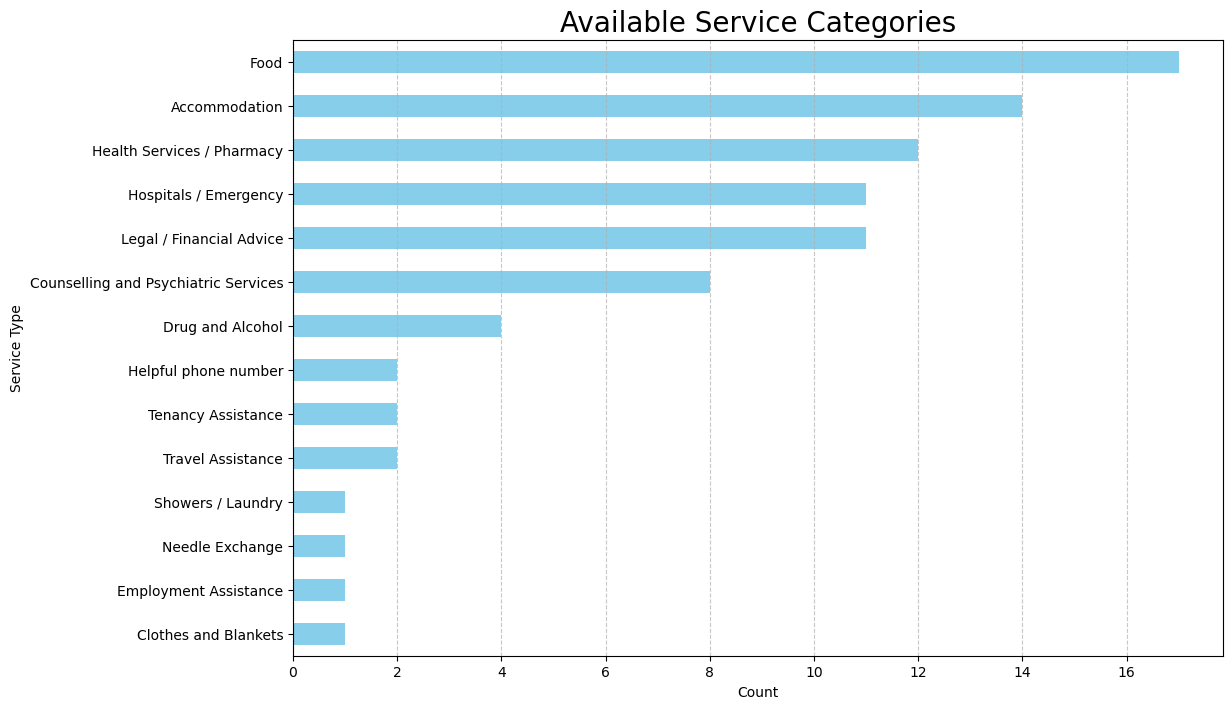

In [20]:
# Count occurrences of each Service Type in 'category_1'
category_counts = ho_df['category_1'].value_counts().sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
category_counts.plot(kind='barh', color='skyblue')

# Customize the chart
plt.xlabel('Count')
plt.ylabel('Service Type')
plt.title('Available Service Categories', fontsize = 20)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability

# Show the plot
plt.show()

The two categories with the most support services available are food and accommodation, with 17 and 14 respectively. 

In [21]:
# Create a map centered at a specific location
my_map = folium.Map(location=[-37.81534, 144.97215], zoom_start=13) # Somewhere in Melbourne so the map is more centred 

# Function to format opening hours
def format_hours(row):
    hours = [
        f"Monday: {row['monday']}" if pd.notna(row['monday']) else "Monday: Time Not Available",
        f"Tuesday: {row['tuesday']}" if pd.notna(row['tuesday']) else "Tuesday: Time Not Available",
        f"Wednesday: {row['wednesday']}" if pd.notna(row['wednesday']) else "Wednesday: Time Not Available",
        f"Thursday: {row['thursday']}" if pd.notna(row['thursday']) else "Thursday: Time Not Available",
        f"Friday: {row['friday']}" if pd.notna(row['friday']) else "Friday: Opening Not Available",
        f"Saturday: {row['saturday']}" if pd.notna(row['saturday']) else "Saturday: Time Not Available",
        f"Sunday: {row['sunday']}" if pd.notna(row['sunday']) else "Sunday: Time Not Available",
        f"Public Holiday: {row['public_holidays']}" if pd.notna(row['public_holidays']) else "Public Holiday: Time Not Available"
    ]
    return "<br>".join(hours)

# Function to add markers to the map
def add_markers(data):
    for index, row in data.iterrows():
        name = row['name']
        phone = row['phone']
        latitude = row['latitude']
        longitude = row['longitude']
        hours_info = format_hours(row)  # Get formatted opening hours
        tooltip_text = f'<b>Name: {name}</b><br><b>Phone: {phone}</b><br>{hours_info}'  # Display name, phone, and hours in the tooltip
        folium.Marker([latitude, longitude], tooltip=tooltip_text).add_to(my_map)

# Function to update the map based on selected filters
def update_map(category):
    global my_map  
    
    my_map = folium.Map(location=[-37.81534, 144.97215], zoom_start=13)  # Reset the map
    
    # Filter data based on selected category
    if category == 'All Categories':
        filtered_data = ho_df
    else:
        filtered_data = ho_df[ho_df['category_1'] == category]
    
    add_markers(filtered_data)
    MousePosition().add_to(my_map)
    display(my_map)

sorted_categories = sorted(ho_df['category_1'].dropna().unique())  # sorting the categories from a-z

# Create dropdown widget for categories
categories_dropdown = widgets.Dropdown(
    options=['All Categories'] + sorted_categories,
    description='Category:',
    disabled=False,
    layout={'width': '40%'}
)

categories_dropdown.style.description_width = '100px'

widgets.interactive(update_map, category=categories_dropdown)  # Display the filtering and map

interactive(children=(Dropdown(description='Category:', layout=Layout(width='40%'), options=('All Categories',…

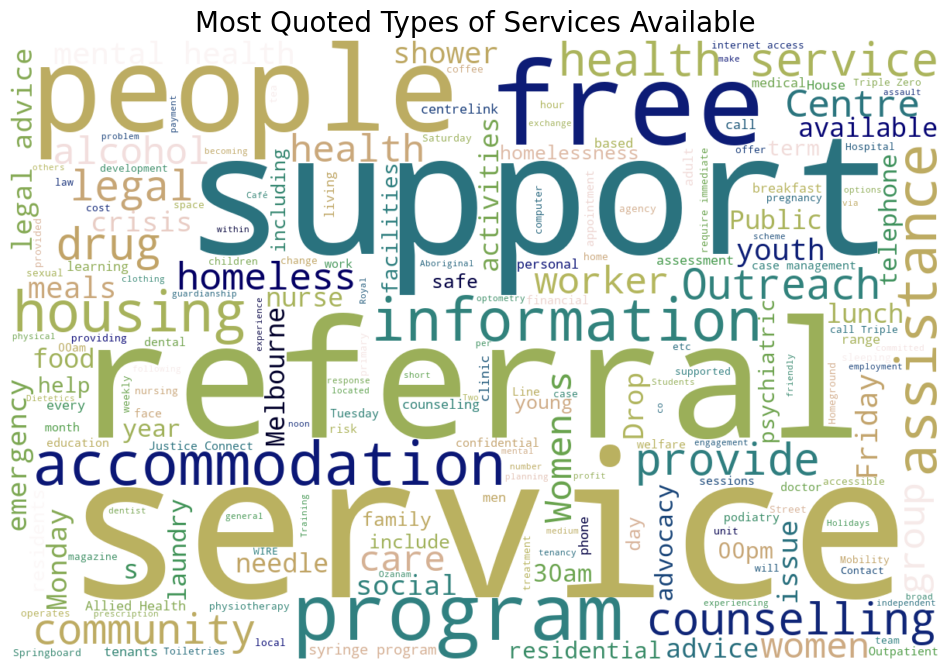

In [22]:
# WordCloud chart - an alternative way to display the most quoted word in the "what" column indicating services which may be available

# Extract text from the 'what' column, dropping na and adding to list 
what_entries = ho_df["what"].dropna().tolist()

# Concatenate all text entries into a single string with words separated by spaces
services = " ".join(what_entries)

# Create a WordCloud instance with specified dimensions, color scheme, and stop words
wordcloud = WordCloud(width=1200, 
                      height=800, 
                      background_color='white',
                      colormap='gist_earth')  

# Generate the word cloud from the concatenated text string
wordcloud.generate(services)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes for better visualization
plt.title('Most Quoted Types of Services Available', fontsize = 20)  # Title for the word cloud
plt.show()


<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="partxxxx">Part xxxxxx- Conclusion </p></a>


# TO be added

<p style="font-weight: bold; font-size: 1.2em;"><a calss="anchor" id="partXXX">Part XXX  - Reference </p></a>

https://data.melbourne.vic.gov.au/pages/home/

https://www.datacamp.com/tutorial/wordcloud-python<br>
https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html<br>
https://www.topcoder.com/thrive/articles/word-cloud-in-python

https://realpython.com/python-folium-web-maps-from-data/<br>
https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94<br>
https://www.kaggle.com/code/daveianhickey/how-to-folium-for-maps-heatmaps-time-data

https://stackoverflow.com/questions/75698393/create-a-raster-from-points-gpd-geodataframe-object-in-python-3-6<br>
https://gis.stackexchange.com/questions/451204/building-a-geodataframe-out-of-a-shapely-geometrycollection-with-shapely-2-0-0<br>
https://geopandas.org/en/stable/docs/user_guide/projections.html

https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html<br>
https://stackoverflow.com/questions/68504942/how-do-geopandas-sjoin-predicate-within-and-intersects-differ<br>
https://snyk.io/advisor/python/geopandas/functions/geopandas.sjoin

https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html<br>
https://developers.arcgis.com/python/guide/using-the-map-widget/
